In [72]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
df = pd.read_csv('../../Datos/Datos_Modelo_1/Modelo_1_CL_1.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category,Quantity_Group
0,2309.650,46.172483,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,189.018154,184.458815,189.018154,403.578108,218.356117,236.429591,419.859543
1,3709.395,45.676969,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,266.760422,263.141456,274.098244,370.195881,385.598466,235.804578,414.634546
2,2832.960,44.650548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,200.966534,156.822734,156.822734,407.568379,600.899868,237.605497,426.668885
3,5244.840,43.421236,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,214.421719,263.931238,278.422249,375.903633,731.886411,236.429591,419.859543
4,4164.050,41.833998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,188.217056,211.376483,188.217056,109.631232,90.052507,237.327635,175.098339


In [74]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [75]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [77]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [49]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 54.37987293],
       [-48.10952588],
       [ 70.63283346]])

In [50]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[124.03732372],
       [ 14.89663692],
       [443.50763251]])

In [51]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [52]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.740927,98.710051,37289.498077,193.104889
test,0.700296,99.850691,43724.732092,209.104596


Text(0, 0.5, 'Predicciones (y_test_pred)')

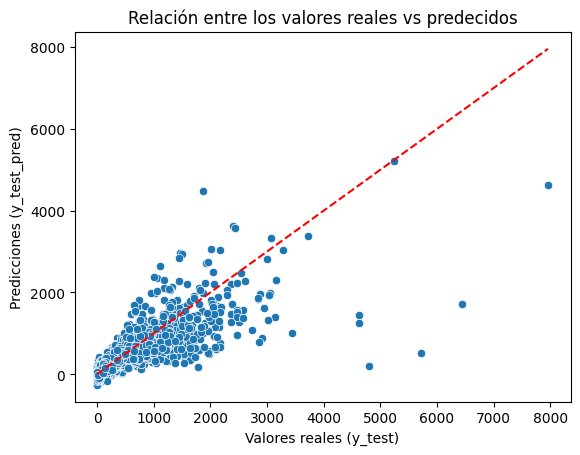

In [53]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

## Decision Tree

In [54]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [55]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [56]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [57]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [ ]:
params_arbol_5 = {
    'max_depth': [5],
    'min_samples_split': [30,35,40,45,50],
    'min_samples_leaf': [17,20,22],
    'max_leaf_nodes': [38,40,42]
}

In [79]:
params_arbol_6 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42,50,60]
}

In [80]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_6,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [32, 35, 40, 42, 50, 60],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [15, 50, 100]},
             scoring='neg_mean_squared_error')

In [81]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [82]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=60, min_samples_leaf=20,
                      min_samples_split=15)

In [83]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [84]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [85]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.855974,65.461256,20730.291179,143.980176
test,0.769598,69.901294,33614.059150,183.341373


In [65]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.085049,0.016919,0.005131,0.001997,5,42,20,45,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-33748.084226,-31448.080574,-25198.851363,-27397.901768,-21796.731640,-27917.929914,4279.849267,1
3,0.150021,0.089714,0.007748,0.003489,5,38,20,45,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-33748.084226,-31448.080574,-25198.851363,-27397.901768,-21796.731640,-27917.929914,4279.849267,1
12,0.123732,0.042437,0.007134,0.001289,5,40,20,45,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-33748.084226,-31448.080574,-25198.851363,-27397.901768,-21796.731640,-27917.929914,4279.849267,1
0,0.109463,0.039857,0.010775,0.006183,5,38,17,45,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-33775.489942,-31533.533858,-25179.859606,-27397.901768,-22081.530091,-27993.663053,4223.409642,4
18,0.083102,0.011989,0.005219,0.001038,5,42,17,45,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-33775.489942,-31533.533858,-25179.859606,-27397.901768,-22081.530091,-27993.663053,4223.409642,5
9,0.164675,0.056773,0.007838,0.002100,5,40,17,45,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-33775.489942,-31533.533858,-25179.859606,-27397.901768,-22081.530091,-27993.663053,4223.409642,5
16,0.079954,0.006429,0.004818,0.000928,5,40,22,50,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-33748.084226,-31448.080574,-25190.046189,-28084.580526,-22496.482597,-28193.454823,4072.697047,7
25,0.075637,0.008993,0.004515,0.001056,5,42,22,50,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-33748.084226,-31448.080574,-25190.046189,-28084.580526,-22496.482597,-28193.454823,4072.697047,7
7,0.125357,0.040771,0.006926,0.001077,5,38,22,50,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-33748.084226,-31448.080574,-25190.046189,-28084.580526,-22496.482597,-28193.454823,4072.697047,7
22,0.084897,0.012813,0.005324,0.002920,5,42,20,50,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-33748.084226,-31448.080574,-25198.851363,-28084.580526,-22496.482597,-28195.215857,4071.399689,10


In [66]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
21,5,42,20,45,-27917.929914
3,5,38,20,45,-27917.929914
12,5,40,20,45,-27917.929914
0,5,38,17,45,-27993.663053
18,5,42,17,45,-27993.663053
9,5,40,17,45,-27993.663053
16,5,40,22,50,-28193.454823
25,5,42,22,50,-28193.454823
7,5,38,22,50,-28193.454823
22,5,42,20,50,-28195.215857


In [67]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [68]:
df_rmse_prof

,param_max_depth,MSE
0,5,167.837181


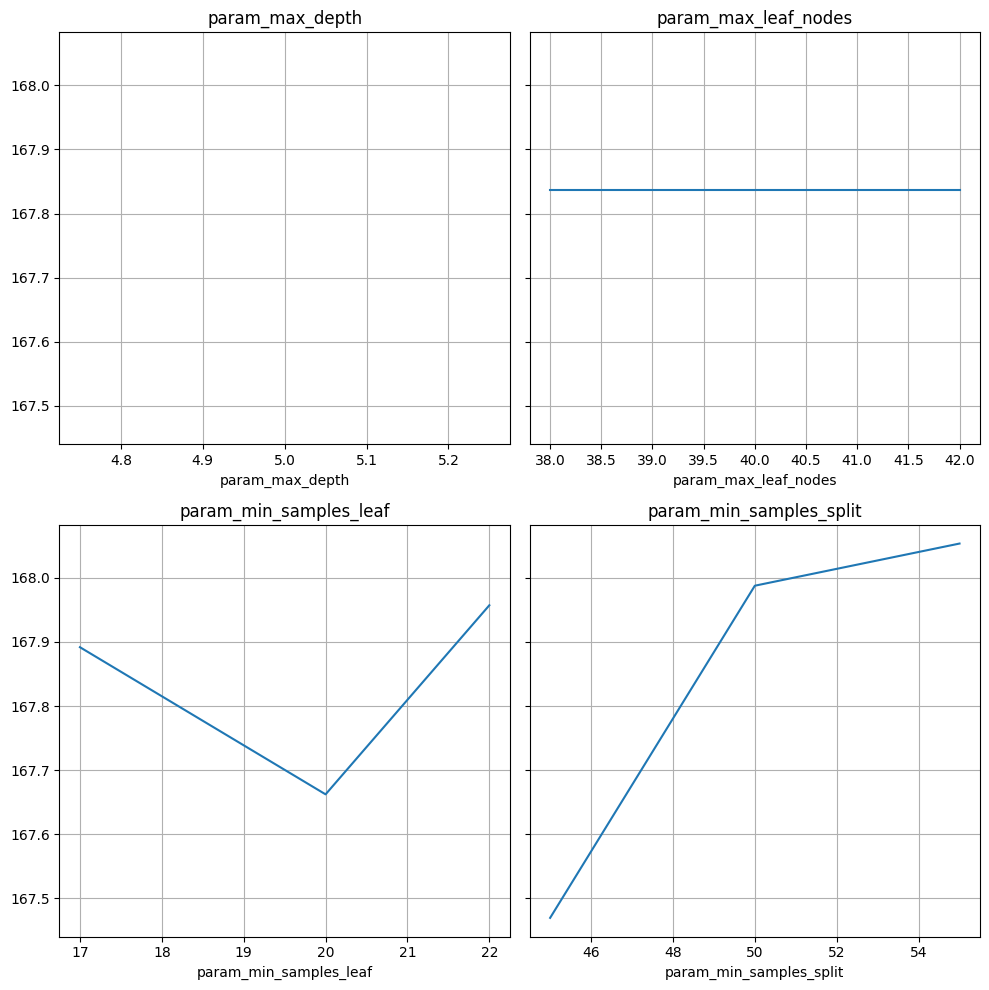

In [69]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [70]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

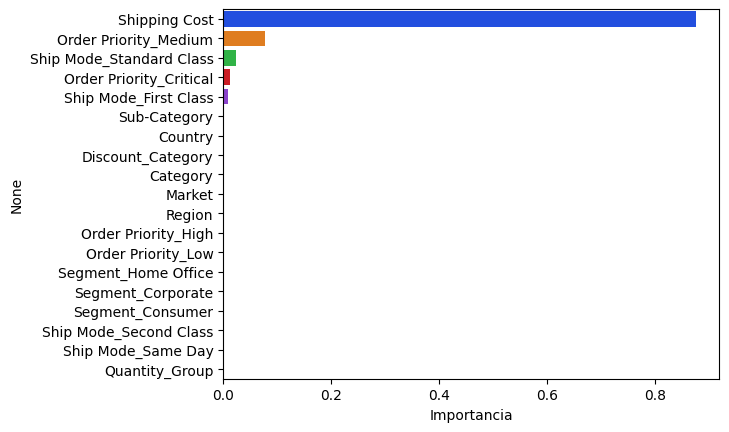

In [71]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [93]:
params_rrf2 = {
    'n_estimators': [100, 250, 300,320,350],
    'max_features': [2,4,8,12,16],
    'max_depth': [5,6,7,8,10,12],
    'min_samples_split': [45,50,55,70],
    'min_samples_leaf': [10,12,15,20,24], 
    'max_leaf_nodes': [45,50,55,60,80,100]
}


In [94]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,8,12,16],
    'max_depth': [5,6,7],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [20], 
    'max_leaf_nodes': [45,50,55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf2,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [95]:
modelo_final_rrf

RandomForestRegressor(max_depth=10, max_features=12, max_leaf_nodes=55,
                      min_samples_leaf=10, min_samples_split=45, n_jobs=-1,
                      random_state=42)

In [96]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.864258,62.999366,19537.874510,139.777947
test,0.783139,67.242749,31638.506233,177.872163


### Random Distinto

In [ ]:
params_rf = {
    'n_estimators': [225,250,300],
    'max_features': [10,12,14],
    'max_depth': [7,9,10,12],
    'min_samples_split': [42,45,48],
    'min_samples_leaf': [8,9,10], 
    'max_leaf_nodes': [55]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [ ]:
modelo_final_rf

RandomForestRegressor(max_depth=9, max_features=15, max_leaf_nodes=50,
                      min_samples_leaf=19, min_samples_split=28,
                      n_estimators=225, random_state=42)

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.681835,95.454141,126418.883699,355.554333
test,0.822438,92.444278,56510.040880,237.718407


## Gradient Booster

In [84]:
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [85]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=100,
                          n_estimators=150, random_state=42)

In [86]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.709826,92.799884,115296.946251,339.554040
test,0.836539,91.005188,52022.231989,228.083827


## XGB

In [88]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [89]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [90]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.650893,115.876686,138713.254347,372.442283
test,0.795905,112.273890,64954.110313,254.860963
